In [179]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [177]:
#sns.set_theme(style="whitegrid")

lung_df = pd.read_csv('lung_cancer_prediction_dataset.csv')
AirPol_df = pd.read_csv('global_air_pollution_dataset.csv')

In [101]:
display(lung_df.head())
display(AirPol_df.head())

,ID,Country,Population_Size,Age,Gender,Smoker,Years_of_Smoking,Cigarettes_per_Day,Passive_Smoker,Family_History,...,Air_Pollution_Exposure,Occupational_Exposure,Indoor_Pollution,Healthcare_Access,Early_Detection,Treatment_Type,Developed_or_Developing,Annual_Lung_Cancer_Deaths,Lung_Cancer_Prevalence_Rate,Mortality_Rate
0,0,China,1400,80,Male,Yes,30,29,No,No,...,Low,Yes,No,Poor,No,NaN,Developing,690000,2.44,0.0
1,1,Iran,84,53,Male,No,0,0,Yes,No,...,Low,Yes,No,Poor,No,NaN,Developing,27000,2.10,0.0
2,2,Mexico,128,47,Male,Yes,12,6,Yes,No,...,Medium,No,No,Poor,Yes,NaN,Developing,28000,1.11,0.0
3,3,Indonesia,273,39,Female,No,0,0,No,Yes,...,Low,No,No,Poor,No,NaN,Developing,40000,0.75,0.0
4,4,South Africa,59,44,Female,No,0,0,Yes,No,...,Medium,Yes,No,Poor,No,NaN,Developing,15000,2.44,0.0


,Country,City,AQI_Value,AQI_Category,CO_AQI_Value,CO_AQI_Category,Ozone_AQI_Value,Ozone_AQI_Category,NO2_AQI_Value,NO2_AQI_Category,PM2.5_AQI_Value,PM2.5_AQI_Category
0,Russian Federation,Praskoveya,51,Moderate,1,Good,36,Good,0,Good,51,Moderate
1,Brazil,Presidente Dutra,41,Good,1,Good,5,Good,1,Good,41,Good
2,Italy,Priolo Gargallo,66,Moderate,1,Good,39,Good,2,Good,66,Moderate
3,Poland,Przasnysz,34,Good,1,Good,34,Good,0,Good,20,Good
4,France,Punaauia,22,Good,0,Good,22,Good,0,Good,6,Good


In [103]:
# Print column names
print("Lung Cancer Dataset Columns:", lung_df.columns.tolist())
print("Air Pollution Dataset Columns:", AirPol_df.columns.tolist())

# Print dataset structure
print("\nLung Cancer Dataset Info:")
print(lung_df.info())

print("\nAir Pollution Dataset Info:")
print(AirPol_df.info())

Lung Cancer Dataset Columns: ['ID', 'Country', 'Population_Size', 'Age', 'Gender', 'Smoker', 'Years_of_Smoking', 'Cigarettes_per_Day', 'Passive_Smoker', 'Family_History', 'Lung_Cancer_Diagnosis', 'Cancer_Stage', 'Survival_Years', 'Adenocarcinoma_Type', 'Air_Pollution_Exposure', 'Occupational_Exposure', 'Indoor_Pollution', 'Healthcare_Access', 'Early_Detection', 'Treatment_Type', 'Developed_or_Developing', 'Annual_Lung_Cancer_Deaths', 'Lung_Cancer_Prevalence_Rate', 'Mortality_Rate']
Air Pollution Dataset Columns: ['Country', 'City', 'AQI_Value', 'AQI_Category', 'CO_AQI_Value', 'CO_AQI_Category', 'Ozone_AQI_Value', 'Ozone_AQI_Category', 'NO2_AQI_Value', 'NO2_AQI_Category', 'PM2.5_AQI_Value', 'PM2.5_AQI_Category']

Lung Cancer Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220632 entries, 0 to 220631
Data columns (total 24 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   ID                

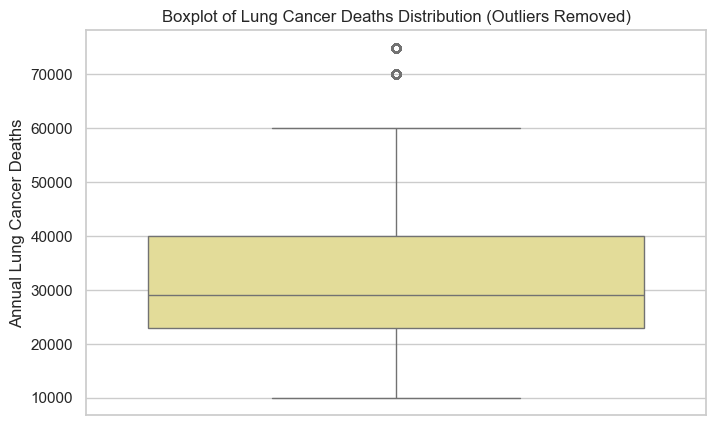

In [167]:
# 1. Boxplot of Lung Cancer Deaths Distribution.
Q1 = lung_df['Annual_Lung_Cancer_Deaths'].quantile(0.25)
Q3 = lung_df['Annual_Lung_Cancer_Deaths'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

boxplot_data = lung_df[(lung_df['Annual_Lung_Cancer_Deaths'] >= lower_bound) & 
                        (lung_df['Annual_Lung_Cancer_Deaths'] <= upper_bound)]

plt.figure(figsize=(8, 5))
sns.boxplot(y=boxplot_data['Annual_Lung_Cancer_Deaths'], color="khaki")
plt.title("Boxplot of Lung Cancer Deaths Distribution (Outliers Removed)")
plt.ylabel("Annual Lung Cancer Deaths")
plt.show()

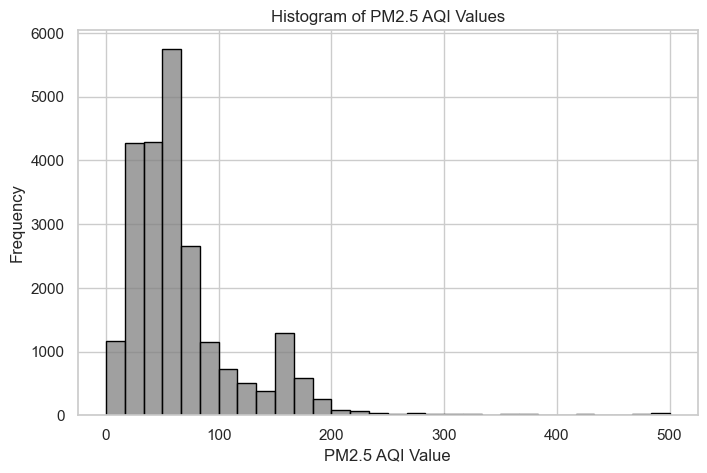

In [169]:
# 2. Histogram of PM2.5 AQI Values
plt.figure(figsize=(8, 5))
sns.histplot(AirPol_df['PM2.5_AQI_Value'], bins=30, color="grey", edgecolor="black")
plt.title("Histogram of PM2.5 AQI Values")
plt.xlabel("PM2.5 AQI Value")
plt.ylabel("Frequency")
plt.show()

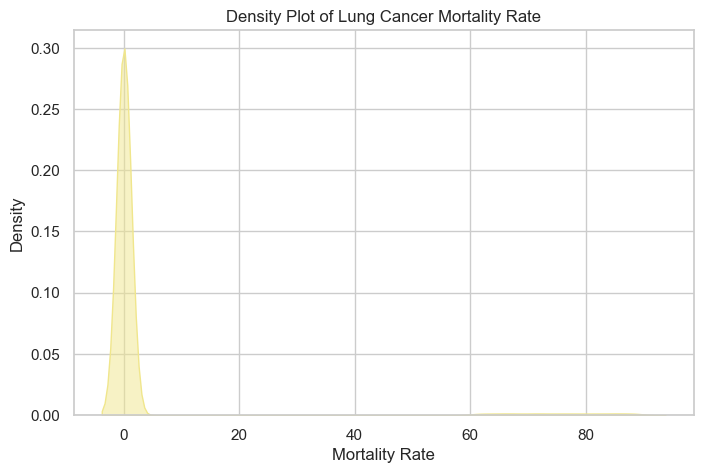

In [187]:
# 3. Density Plot of Lung Cancer Mortality Rate
plt.figure(figsize=(8, 5))
sns.kdeplot(lung_df['Mortality_Rate'], fill=True, color="khaki", alpha=0.5);
plt.title("Density Plot of Lung Cancer Mortality Rate")
plt.xlabel("Mortality Rate")
plt.ylabel("Density")
plt.show()

# Part 4. Plot 1

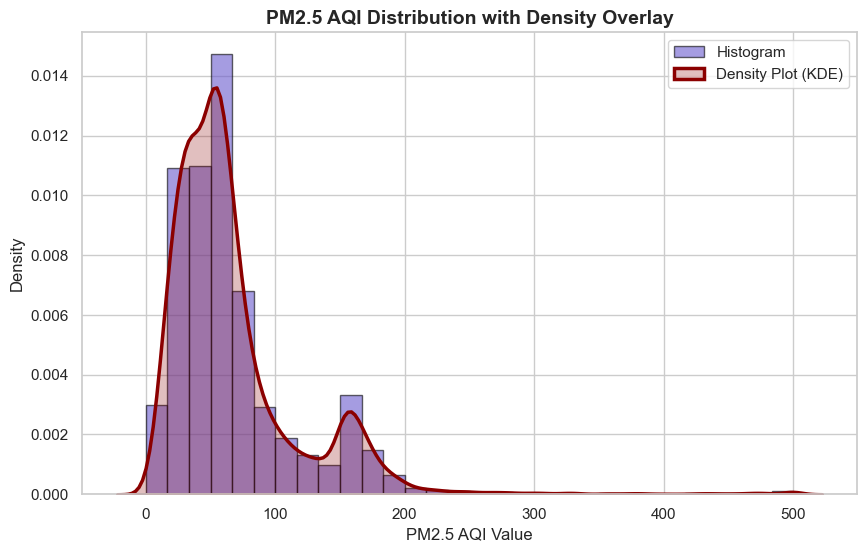

In [189]:
plt.figure(figsize=(10, 6))
plt.hist(AirPol_df['PM2.5_AQI_Value'], bins=30, density=True, alpha=0.6, color="#6A5ACD", edgecolor="black", label="Histogram")
sns.kdeplot(AirPol_df['PM2.5_AQI_Value'], color="#8B0000", fill="#D9AEB0", linewidth=2.5, label="Density Plot (KDE)")
plt.title("PM2.5 AQI Distribution with Density Overlay", fontsize=14, fontweight="bold")
plt.xlabel("PM2.5 AQI Value", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.legend(loc="best", frameon=True)
plt.show();